# Analisis Prediktif: Prediksi Data Penumpang Kapal Titanic

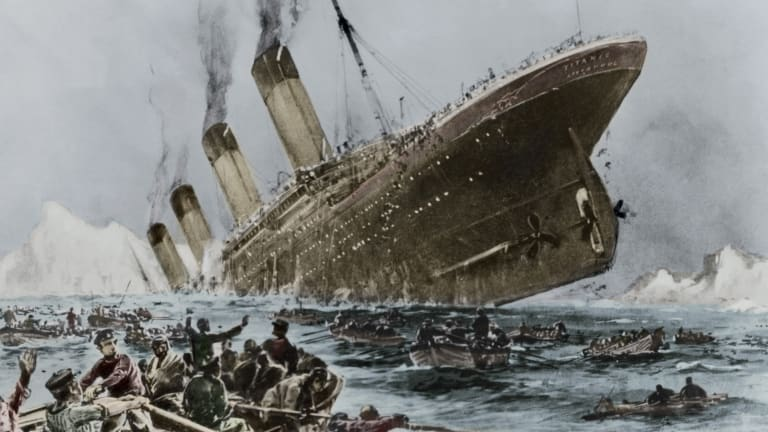

# 1. Pendahuluan

Pada proyek ini, topik yang saya bahas adalah mengenai kelautan yang di buat untuk memprediksi data penumpang seperti apa yang dapat selamat dari tragedi tenggelamnya kapal pesiar super yaitu RMS Titanic. Kapal yang dikenal Titanic ini merupakan kapal penumpang paling besar di zamannya, kapal milik Britania Raya ini tenggelam di bagian utara samudera Atlantik pada tanggal 15 April 1912. Pada saat pelayaran perdana dari Southampton, Inggris menuju New York, Amerika Serikat kapal Titanic menabrak sebuah gunung es. Namun ada juga korban selamat dan sebagian peneliti yang mengungkapkan bahwa penyebab tenggelamnya kapal ini dikarenakan kebakaran.



---



# 2. Mengimpor Modul yang Akan Dibutuhkan

In [1]:
# pengolahan data
import pandas as pd

# visualisasi data
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns
sns.set()

# model data
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.svm import SVC
from sklearn.model_selection import KFold
from sklearn.model_selection import cross_val_score

# evaluasi model
import numpy as np



---



# 3. Mempersiapkan Dataset

## 3.1 Menyiapkan kredensial akun Kaggle



In [2]:
! pip install -q kaggle

from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"rizalsihombing","key":"89017053dc2cceffa0e20419d090c360"}'}

## 3.2 Mengunduh dataset

In [3]:
! mkdir ~/.kaggle
! cp kaggle.json ~/.kaggle/
! chmod 600 ~/.kaggle/kaggle.json
! kaggle competitions download -c 'Titanic'

  0% 0.00/3.18k [00:00<?, ?B/s]
100% 3.18k/3.18k [00:00<00:00, 6.22MB/s]
  0% 0.00/28.0k [00:00<?, ?B/s]
100% 28.0k/28.0k [00:00<00:00, 23.0MB/s]
  0% 0.00/59.8k [00:00<?, ?B/s]
100% 59.8k/59.8k [00:00<00:00, 49.8MB/s]




---



# 4. Pemahaman Data (Data Understanding)

## 4.1 Memuat data

In [4]:
train = pd.read_csv('/content/train.csv')
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [5]:
test = pd.read_csv('/content/test.csv')
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S


## 4.2 Keterangan kolom pada dataset

### 4.2.a Kamus data

* Survived (penumpang selamat) : 0 = Tidak, 1 = Ya
* Pclass (kelas tiket) : 1 = 1st, 2 = 2nd, 3 = 3rd
* SibSp : jumlah saudara kandung atau pasangan yang dibawa oleh penumpang
* Parch : jumlah keluarga atau anak yang dibawa oleh penumpang
* Ticket : nomor tiket
* Cabin : kategori kabin
* Embarked (dari pelabuhan mana penumpang naik) : \
C = Cherbourg, Q = Queenstown, S = Southampton


In [6]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 418 entries, 0 to 417
Data columns (total 11 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  418 non-null    int64  
 1   Pclass       418 non-null    int64  
 2   Name         418 non-null    object 
 3   Sex          418 non-null    object 
 4   Age          332 non-null    float64
 5   SibSp        418 non-null    int64  
 6   Parch        418 non-null    int64  
 7   Ticket       418 non-null    object 
 8   Fare         417 non-null    float64
 9   Cabin        91 non-null     object 
 10  Embarked     418 non-null    object 
dtypes: float64(2), int64(4), object(5)
memory usage: 36.0+ KB


### 4.2.b Menghitung jumlah data yang kosong

In [8]:
train.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [9]:
test.isnull().sum()

PassengerId      0
Pclass           0
Name             0
Sex              0
Age             86
SibSp            0
Parch            0
Ticket           0
Fare             1
Cabin          327
Embarked         0
dtype: int64

### 4.2.c Deskripsi setiap kolom

In [10]:
train.describe()

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


In [11]:
test.describe()

,PassengerId,Pclass,Age,SibSp,Parch,Fare
count,418.000000,418.000000,332.000000,418.000000,418.000000,417.000000
mean,1100.500000,2.265550,30.272590,0.447368,0.392344,35.627188
std,120.810458,0.841838,14.181209,0.896760,0.981429,55.907576
min,892.000000,1.000000,0.170000,0.000000,0.000000,0.000000
25%,996.250000,1.000000,21.000000,0.000000,0.000000,7.895800
50%,1100.500000,3.000000,27.000000,0.000000,0.000000,14.454200
75%,1204.750000,3.000000,39.000000,1.000000,0.000000,31.500000
max,1309.000000,3.000000,76.000000,8.000000,9.000000,512.329200


## 4.3 Visualisasi data

Memvisualisasikan fitur kategorik menggunakan diagram batang, diantaranya :

* a. Pclass
* b. Sex
* c. SibSp
* d. Parch
* e. Embarked

In [12]:
def bar_chart(feature):
    survived = train[train['Survived']==1][feature].value_counts()
    dead = train[train['Survived']==0][feature].value_counts()
    df = pd.DataFrame([survived,dead])
    df.index = ['Survived','Dead']
    df.plot(kind='bar',stacked=True, figsize=(10,5))

### 4.3.a Pclass (kelas tiket)

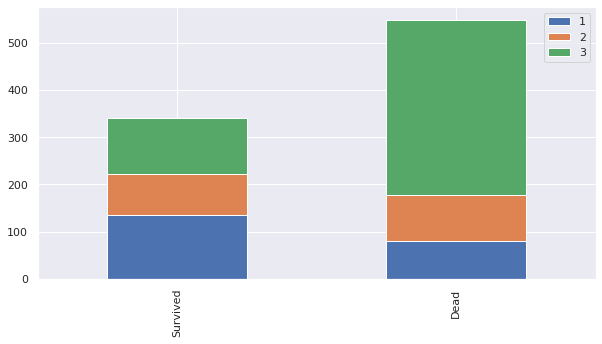

In [13]:
bar_chart('Pclass')

Berdasarkan diagram batang diatas informasi yang didapatkan adalah : 
* Penumpang dengan kelas tiket 1, lebih mungkin untuk **selamat** dibanding dengan kelas tiket 2 maupun 3
* Penumpang dengan kelas tiket 3, lebih mungkin **tidak selamat** dibanding dengan kelas tiket 1 maupun 2

### 4.3.b Sex (gender)

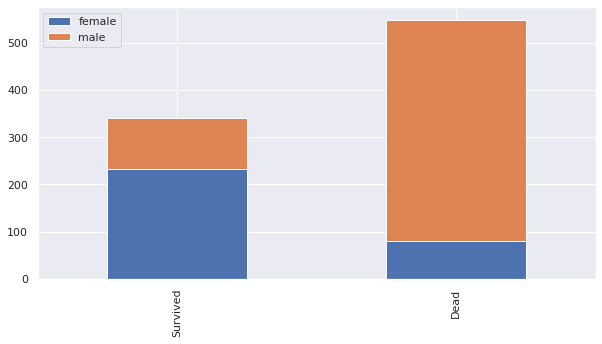

In [14]:
bar_chart('Sex')

Berdasarkan diagram batang diatas informasi yang didapatkan adalah : \
* Penumpang **wanita** lebih mungkin selamat, dibandingkan penumpang **pria**

### 4.3.c SibSp (jumlah saudara atau pasangan yang dibawa oleh penumpang)

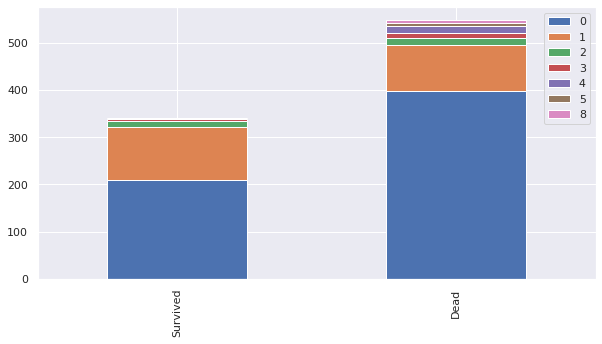

In [15]:
bar_chart('SibSp')

Berdasarkan diagram batang diatas informasi yang didapatkan adalah : 
* Penumpang yang naik **lebih dari 2 saudara kandung atau pasangan kemungkinan selamat**
* Penumpang yang naik **tanpa saudara kandung atau pasangan lebih mungkin tidak selamat**

### 4.3.d Parch (jumlah keluarga atau anak yang dibawa oleh penumpang)

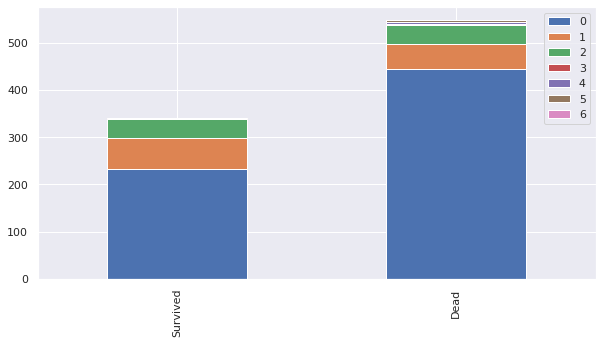

In [16]:
bar_chart('Parch')

Berdasarkan diagram batang diatas informasi yang didapatkan adalah : 
* Penumpang yang naik dengan **lebih dari 2 anggota keluarga lebih mungkin selamat**
* Penumpang yang naik **sendirian lebih mungkin tidak selamat**

### 4.3.e Embarked (dari pelabuhan mana penumpang naik)

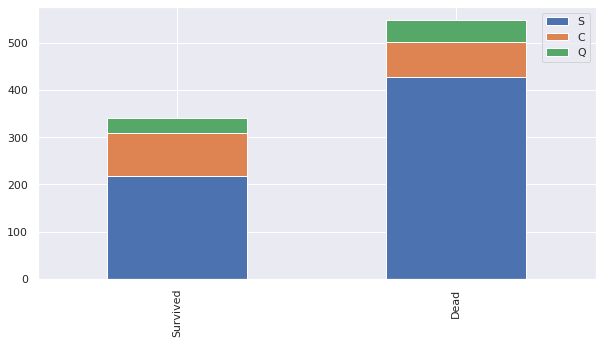

In [17]:
bar_chart('Embarked')

Berdasarkan diagram batang diatas informasi yang didapatkan adalah : 
* Penumpang yang naik dari pelabuhan **S (Southampton) lebih mungkin tidak selamat**
* Penumpang yang naik dari pelabuhan **C (Cherbourg) sedikit lebih mungkin selamat**
* Penumpang yang naik dari pelabuhan **Q (Queenstown) lebih mungkin tidak selamat**



---



# 5. Persiapan Data & Eksplorasi Data


In [18]:
train.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C


In [19]:
test.head(10)

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,892,3,"Kelly, Mr. James",male,34.5,0,0,330911,7.8292,NaN,Q
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",female,47.0,1,0,363272,7.0000,NaN,S
2,894,2,"Myles, Mr. Thomas Francis",male,62.0,0,0,240276,9.6875,NaN,Q
3,895,3,"Wirz, Mr. Albert",male,27.0,0,0,315154,8.6625,NaN,S
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",female,22.0,1,1,3101298,12.2875,NaN,S
5,897,3,"Svensson, Mr. Johan Cervin",male,14.0,0,0,7538,9.2250,NaN,S
6,898,3,"Connolly, Miss. Kate",female,30.0,0,0,330972,7.6292,NaN,Q
7,899,2,"Caldwell, Mr. Albert Francis",male,26.0,1,1,248738,29.0000,NaN,S
8,900,3,"Abrahim, Mrs. Joseph (Sophie Halaut Easu)",female,18.0,0,0,2657,7.2292,NaN,C
9,901,3,"Davies, Mr. John Samuel",male,21.0,2,0,A/4 48871,24.1500,NaN,S


## 5.1 Kolom Name

Tujuannya adalah untuk mendapatkan informasi yang lebih spesifik, contohnya "apakah penumpang Titanic seorang pria atau wanita", "apakah penumpang Titanic sudah menikah atau belum menikah". Dengan membuat sebuah kolom baru yaitu *Title*

In [20]:
# mengkombinasikan dataset train dengan dataset test
train_test_data = [train, test]

# mengekstrak nama penumpang dengan menghilangkan namanya
for dataset in train_test_data:
    dataset['Title'] = dataset['Name'].str.extract(' ([A-Za-z]+)\.', expand=False)

In [21]:
train['Title'].value_counts()

Mr          517
Miss        182
Mrs         125
Master       40
Dr            7
Rev           6
Mlle          2
Major         2
Col           2
Countess      1
Ms            1
Don           1
Jonkheer      1
Mme           1
Lady          1
Capt          1
Sir           1
Name: Title, dtype: int64

In [22]:
test['Title'].value_counts()

Mr        240
Miss       78
Mrs        72
Master     21
Col         2
Rev         2
Dr          1
Ms          1
Dona        1
Name: Title, dtype: int64

Setelah nama sudah diekstrak, kemudian dilakukan pengelompokan penumpang secara numerik diantaranya :
* 0 = Mr
* 1 = Miss
* 2 = Mrs
* 3 = Lainnya

In [23]:
title_mapping = {"Mr": 0, "Miss": 1, "Mrs": 2, 
                 "Master": 3, "Dr": 3, "Rev": 3, "Col": 3, "Major": 3, "Mlle": 3,"Countess": 3,
                 "Ms": 3, "Lady": 3, "Jonkheer": 3, "Don": 3, "Dona" : 3, "Mme": 3,"Capt": 3,"Sir": 3 }
for dataset in train_test_data:
    dataset['Title'] = dataset['Title'].map(title_mapping)

Visualisasi fitur *Title*

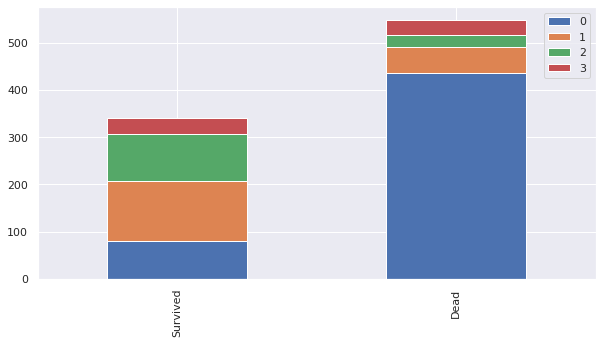

In [24]:
bar_chart('Title')

## 5.2 Kolom Sex (gender)

Tujuannya adalah untuk mengelompokkan gender secara biner, diantaranya :

*   Male = 0
*   Female = 1



In [25]:
sex_mapping = {"male": 0, "female": 1}

for dataset in train_test_data:
    dataset['Sex'] = dataset['Sex'].map(sex_mapping)

In [26]:
train['Sex'].value_counts()

0    577
1    314
Name: Sex, dtype: int64

In [27]:
test['Sex'].value_counts()

0    266
1    152
Name: Sex, dtype: int64

Visualisasi fitur *Sex* (gender)

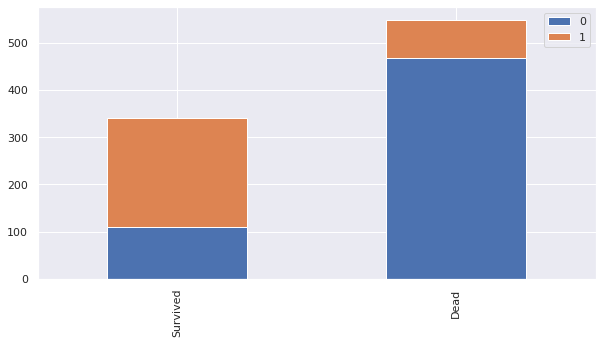

In [28]:
bar_chart('Sex')

## 5.3 Kolom Age (umur)

Pertama mengisi nilai yang kosong menggunakan rata-rata (median), lalu mengelompokkan data secara kategorik :

* child (anak-anak) : 0
* young (remaja) : 1
* adult (dewasa) : 2
* mid-age (paruh baya) : 3
* senior (lansia) : 4


In [29]:
train["Age"].fillna(train.groupby("Title")["Age"].transform("median"), inplace=True)
test["Age"].fillna(test.groupby("Title")["Age"].transform("median"), inplace=True)

In [30]:
train.groupby("Title")["Age"].transform("median")

0      30.0
1      35.0
2      21.0
3      35.0
4      30.0
       ... 
886     9.0
887    21.0
888    21.0
889    30.0
890    30.0
Name: Age, Length: 891, dtype: float64

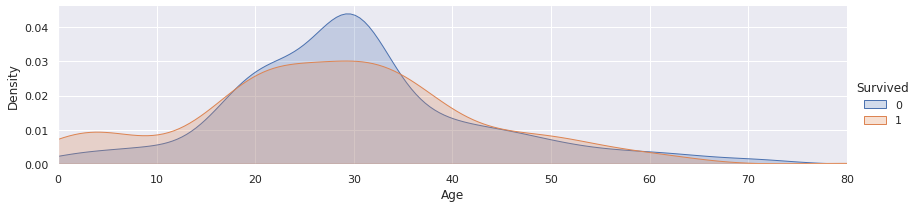

In [31]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, train['Age'].max()))
facet.add_legend()
 
plt.show()

In [32]:
for dataset in train_test_data:
    dataset.loc[ dataset['Age'] <= 16, 'Age'] = 0
    dataset.loc[(dataset['Age'] > 16) & (dataset['Age'] <= 26), 'Age'] = 1
    dataset.loc[(dataset['Age'] > 26) & (dataset['Age'] <= 36), 'Age'] = 2
    dataset.loc[(dataset['Age'] > 36) & (dataset['Age'] <= 62), 'Age'] = 3
    dataset.loc[ dataset['Age'] > 62, 'Age'] = 4

Visualisasi fitur *Age* (umur)

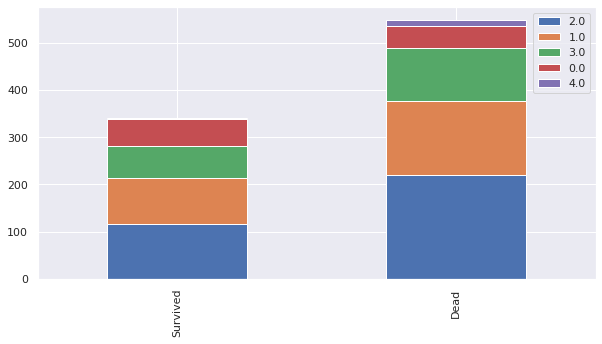

In [33]:
bar_chart('Age')

## 5.4 Kolom Embarked (dari pelabuhan mana penumpang naik)

Pertama mencari yang sering muncul (modus), lalu nilai yang kosong akan diisi dengan nilai yang sering muncul (modus) tersebut.

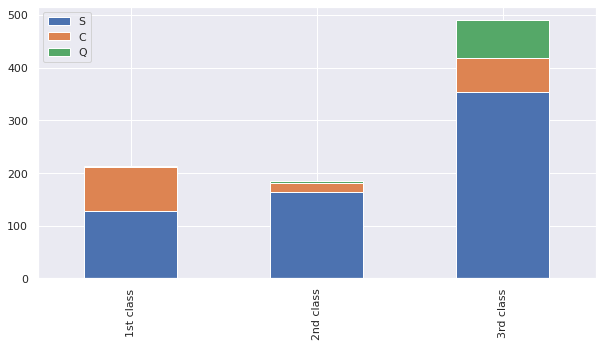

In [34]:
Pclass1 = train[train['Pclass']==1]['Embarked'].value_counts()
Pclass2 = train[train['Pclass']==2]['Embarked'].value_counts()
Pclass3 = train[train['Pclass']==3]['Embarked'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

Dari grafik batang tersebut didapatkan bahwa lebih dari 50% dari kelas 1st, kelas 2nd, dan kelas 3rd berasal dari kota S (Southampton). \
Maka selanjutnya mengisi nilai kosong yang ada pada fitur *Embarked* dengan nilai S (Southampton)

In [35]:
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].fillna('S')

Lalu mengelompokkan datanya berdasarkan kategorik secara numerik berikut :

* 0 = Southampton
* 1 = Cherbourg
* 2 = Queenstown

In [36]:
embarked_mapping = {"S": 0, "C": 1, "Q": 2}
for dataset in train_test_data:
    dataset['Embarked'] = dataset['Embarked'].map(embarked_mapping)

## 5.5 Kolom Fare (tarif)

Pertama mengisi nilai yang kosong yang ada di dalam kolom Fare menggunakan nilai tengah (median), lalu mengelompokkan data secara numerik setiap Pclass :

* 0 = kurang dari 17 Poundsterling (UK)
* 1 = lebih dari 17 Poundsterling (UK)
* 2 = lebih dari 30 Poundsterling (UK)
* 3 = lebih dari 100 Poundsterling (UK)

In [37]:
train["Fare"].fillna(train.groupby("Pclass")["Fare"].transform("median"), inplace=True)
test["Fare"].fillna(test.groupby("Pclass")["Fare"].transform("median"), inplace=True)

In [38]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,7.2500,NaN,0,0
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,71.2833,C85,1,2
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,7.9250,NaN,0,1
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,53.1000,C123,0,2
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,8.0500,NaN,0,0


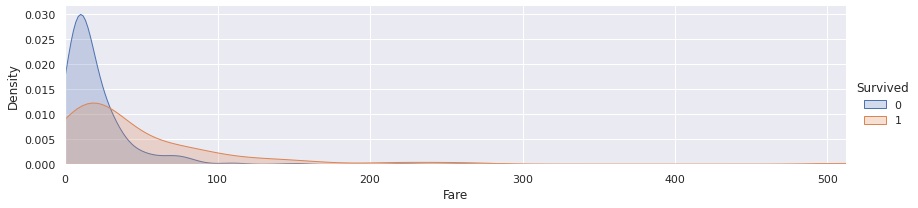

In [39]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Fare',shade= True)
facet.set(xlim=(0, train['Fare'].max()))
facet.add_legend()
plt.show()

In [40]:
for dataset in train_test_data:
    dataset.loc[ dataset['Fare'] <= 17, 'Fare'] = 0
    dataset.loc[(dataset['Fare'] > 17) & (dataset['Fare'] <= 30), 'Fare'] = 1
    dataset.loc[(dataset['Fare'] > 30) & (dataset['Fare'] <= 100), 'Fare'] = 2
    dataset.loc[ dataset['Fare'] > 100, 'Fare'] = 3

Visualisasi fitur *Fare* (tarif)

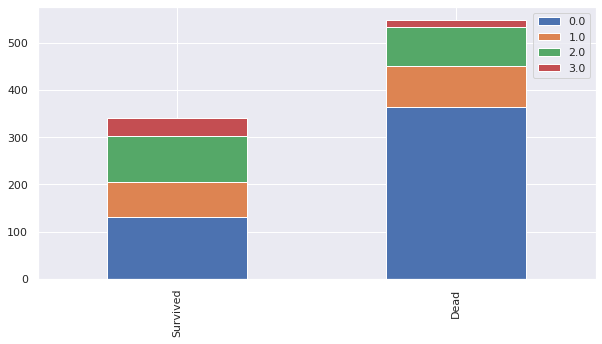

In [41]:
bar_chart('Fare')

## 5.6 Kolom Cabin (kategori cabin)

Mengelompokkan data secara skala :

* A = 0.0
* B = 0.4
* C = 0.8
* D = 1.2
* E = 1.6
* F = 2.0
* G = 2.4
* T = 2.8

In [42]:
train.Cabin.value_counts()

C23 C25 C27    4
G6             4
B96 B98        4
F33            3
E101           3
              ..
C30            1
B82 B84        1
D9             1
D45            1
B101           1
Name: Cabin, Length: 147, dtype: int64

In [43]:
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].str[:1]

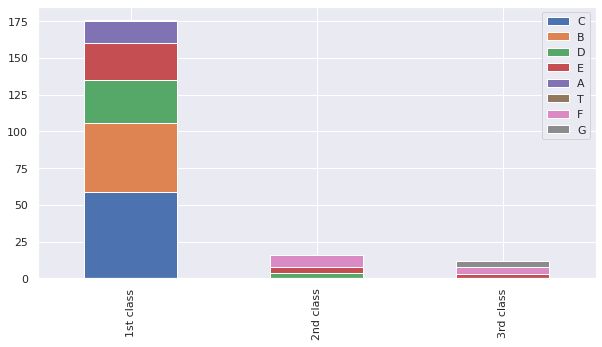

In [44]:
Pclass1 = train[train['Pclass']==1]['Cabin'].value_counts()
Pclass2 = train[train['Pclass']==2]['Cabin'].value_counts()
Pclass3 = train[train['Pclass']==3]['Cabin'].value_counts()
df = pd.DataFrame([Pclass1, Pclass2, Pclass3])
df.index = ['1st class','2nd class', '3rd class']
df.plot(kind='bar',stacked=True, figsize=(10,5))

In [45]:
cabin_mapping = {"A": 0, "B": 0.4, "C": 0.8, "D": 1.2, "E": 1.6, "F": 2, "G": 2.4, "T": 2.8}
for dataset in train_test_data:
    dataset['Cabin'] = dataset['Cabin'].map(cabin_mapping)

Lalu mengisi nilai yang kosong menggunakan nilai tengah (median)

In [46]:
train["Cabin"].fillna(train.groupby("Pclass")["Cabin"].transform("median"), inplace=True)
test["Cabin"].fillna(test.groupby("Pclass")["Cabin"].transform("median"), inplace=True)

## 5.6 Kolom NumOfFamily (Jumlah Keluarga) gabungan dari SibSp + Parch 

Pertama menjumlahkan data penumpang SibSp (jumlah saudara kandung atau pasangan yang dibawa oleh penumpang) + Parch (jumlah keluarga atau anak yang dibawa oleh penumpang) lalu membuat fitur baru yaitu **NumOfFamily**

In [47]:
train["NumOfFamily"] = train["SibSp"] + train["Parch"] + 1
test["NumOfFamily"] = test["SibSp"] + test["Parch"] + 1

(0.0, 11.0)

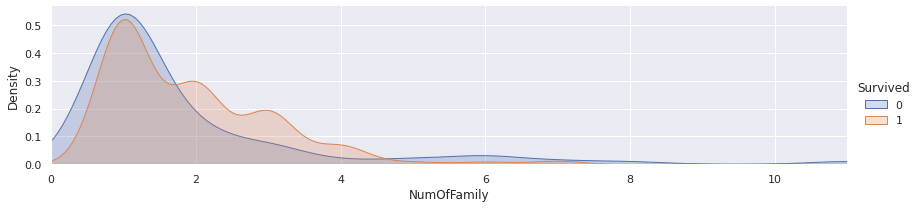

In [48]:
facet = sns.FacetGrid(train, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'NumOfFamily',shade= True)
facet.set(xlim=(0, train['NumOfFamily'].max()))
facet.add_legend()
plt.xlim(0)

In [49]:
family_mapping = {1: 0, 2: 0.4, 3: 0.8, 4: 1.2, 5: 1.6, 6: 2, 7: 2.4, 8: 2.8, 9: 3.2, 10: 3.6, 11: 4}
for dataset in train_test_data:
    dataset['NumOfFamily'] = dataset['NumOfFamily'].map(family_mapping)

In [50]:
train.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NumOfFamily
0,1,0,3,"Braund, Mr. Owen Harris",0,1.0,1,0,A/5 21171,0.0,2.0,0,0,0.4
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,3.0,1,0,PC 17599,2.0,0.8,1,2,0.4
2,3,1,3,"Heikkinen, Miss. Laina",1,1.0,0,0,STON/O2. 3101282,0.0,2.0,0,1,0.0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,2.0,1,0,113803,2.0,0.8,0,2,0.4
4,5,0,3,"Allen, Mr. William Henry",0,2.0,0,0,373450,0.0,2.0,0,0,0.0


In [51]:
test.head()

,PassengerId,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,Title,NumOfFamily
0,892,3,"Kelly, Mr. James",0,2.0,0,0,330911,0.0,2.0,2,0,0.0
1,893,3,"Wilkes, Mrs. James (Ellen Needs)",1,3.0,1,0,363272,0.0,2.0,0,2,0.4
2,894,2,"Myles, Mr. Thomas Francis",0,3.0,0,0,240276,0.0,2.0,2,0,0.0
3,895,3,"Wirz, Mr. Albert",0,2.0,0,0,315154,0.0,2.0,0,0,0.0
4,896,3,"Hirvonen, Mrs. Alexander (Helga E Lindqvist)",1,1.0,1,1,3101298,0.0,2.0,0,2,0.8


## 5.7 Membuang kolom yang tidak digunakan

In [52]:
features_drop = ['Name', 'Ticket', 'SibSp', 'Parch']
train = train.drop(features_drop, axis=1)
test = test.drop(features_drop, axis=1)
train = train.drop(['PassengerId'], axis=1)
test = test.drop(['PassengerId'], axis=1)

In [53]:
train_data = train.drop('Survived', axis=1)
target = train['Survived']
test_data = test

In [54]:
train_data.shape, target.shape

((891, 8), (891,))

In [55]:
train_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,NumOfFamily
0,3,0,1.0,0.0,2.0,0,0,0.4
1,1,1,3.0,2.0,0.8,1,2,0.4
2,3,1,1.0,0.0,2.0,0,1,0.0
3,1,1,2.0,2.0,0.8,0,2,0.4
4,3,0,2.0,0.0,2.0,0,0,0.0


In [56]:
test_data.shape

(418, 8)

In [57]:
test_data.head()

,Pclass,Sex,Age,Fare,Cabin,Embarked,Title,NumOfFamily
0,3,0,2.0,0.0,2.0,2,0,0.0
1,3,1,3.0,0.0,2.0,0,2,0.4
2,2,0,3.0,0.0,2.0,2,0,0.0
3,3,0,2.0,0.0,2.0,0,0,0.0
4,3,1,1.0,0.0,2.0,0,2,0.8




---



# 6. Pemodelan Data

Cross Validation

In [58]:
k_fold = KFold(n_splits=10, shuffle=True, random_state=0)

## 6.1 K-NN

In [59]:
knn = KNeighborsClassifier(n_neighbors = 13)
scoring = 'accuracy'
knn_score = cross_val_score(knn, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(knn_score)

[0.82222222 0.76404494 0.80898876 0.83146067 0.87640449 0.82022472
 0.85393258 0.79775281 0.84269663 0.84269663]


### Skor rata-rata K-NN

In [60]:
round(np.mean(knn_score)*100, 2)

82.6

## 6.2 Decision Tree

In [61]:
decision_tree = DecisionTreeClassifier()
scoring = 'accuracy'
decision_tree_score = cross_val_score(decision_tree, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(decision_tree_score)

[0.76666667 0.80898876 0.75280899 0.7752809  0.88764045 0.75280899
 0.83146067 0.82022472 0.75280899 0.78651685]


### Skor rata-rata Decision Tree

In [62]:
round(np.mean(decision_tree_score)*100, 2)

79.35

## 6.3 Random Forest

In [63]:
random_forest = RandomForestClassifier(n_estimators=13)
scoring = 'accuracy'
random_forest_score = cross_val_score(random_forest, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(random_forest_score)

[0.74444444 0.84269663 0.83146067 0.7752809  0.88764045 0.78651685
 0.80898876 0.80898876 0.75280899 0.82022472]


### Skor rata-rata Random Forest

In [64]:
round(np.mean(random_forest_score)*100, 2)

80.59

## 6.3 Super Vector Machine (Classifier)

In [65]:
svc = SVC()
scoring = 'accuracy'
svc_score = cross_val_score(svc, train_data, target, cv=k_fold, n_jobs=1, scoring=scoring)
print(svc_score)

[0.83333333 0.79775281 0.83146067 0.82022472 0.84269663 0.82022472
 0.84269663 0.85393258 0.84269663 0.86516854]


### Skor rata-rata SVM (Classifier)

In [66]:
round(np.mean(svc_score)*100,2)

83.5

Setelah melakukan pemodelan data, didapatkan bahwa pemodelan menggunakan algoritma **Super Vector Machine (Classifier)** mendapatkan hasil rata-rata akurasi tertinggi. Yaitu  = 83.5.
\
Selanjutnya model dengan algoritma Super Vector Machine (Classifier) ini bisa di jadikan model baseline dan secara bertahap bisa ditingkatkan kompleksitas algoritma-nya.



---



# 7. Evaluasi

## 7.1 Confussion Matrix

In [67]:
svc.fit(train_data, target)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='rbf',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [68]:
from sklearn.metrics import confusion_matrix

# mendapatkan prediksinya
target_pred = svc.predict(train_data)

# menghitung confusion matrix
conf_matrix = confusion_matrix(y_true=target, y_pred=target_pred)

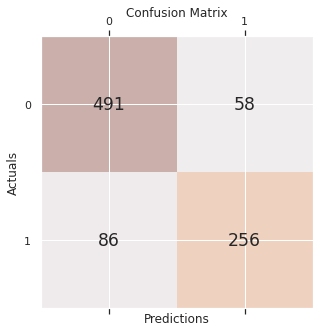

In [71]:
# menampilkan visualisasi confusion matrix menggunakan Matplotlib
fig, ax = plt.subplots(figsize=(5, 5))
ax.matshow(conf_matrix, cmap=plt.cm.Oranges, alpha=0.3)
for i in range(conf_matrix.shape[0]):
    for j in range(conf_matrix.shape[1]):
        ax.text(x=j, y=i,s=conf_matrix[i, j], va='center', ha='center', size='xx-large')
 
plt.xlabel('Predictions', fontsize=12)
plt.ylabel('Actuals', fontsize=12)
plt.title('Confusion Matrix', fontsize=12)
plt.show()

* True Positive (TP): True positive mewakili nilai prediksi positif yang benar dari kasus positif aktual. Dari 314 positif aktual, 256 diprediksi positif dengan benar. Jadi, nilai True Positive adalah 256.

* False Positive (FP): Positif palsu mewakili nilai prediksi positif yang salah. Nilai ini mewakili jumlah negatif (dari 342) yang diprediksi salah sebagai positif. Dari 342 negatif yang sebenarnya, 86 salah diprediksi sebagai positif. Jadi, nilai False Positive adalah 86.

* True Negative (TN): Benar negatif mewakili nilai prediksi yang benar dari negatif dari kasus negatif yang sebenarnya. Dari 577 negatif aktual, 491 diprediksi negatif dengan benar. Jadi, nilai True Negative adalah 491.

* False Negative (FN): Negatif palsu mewakili nilai prediksi negatif yang salah. Nilai ini mewakili jumlah positif (dari 342) yang diprediksi salah sebagai negatif. Dari 342 positif aktual, 86 diprediksi salah sebagai negatif. Jadi, nilai Negatif Palsu adalah 86.

In [76]:
# mengimport library
from sklearn.metrics import precision_score, recall_score, f1_score, accuracy_score

### 7.1.a Precision

In [81]:
print('Precision: %.3f' % precision_score(target, target_pred))

Precision: 0.815


### 7.1.b Recall

In [78]:
print('Recall: %.3f' % recall_score(target, target_pred))

Recall: 0.749


### 7.1.c Accuracy

In [79]:
print('Accuracy: %.3f' % accuracy_score(target, target_pred))

Accuracy: 0.838


### 7.1.d F1 Score

In [80]:
print('F1 Score: %.3f' % f1_score(target, target_pred))

F1 Score: 0.780




---



# Penutupan
Model untuk memprediksi **penumpang seperti apa yang dapat selamat dari tenggelamnya kapal Titanic**  telah selesai dibuat dan model ini dapat digunakan untuk memprediksi data sebenarnya. Namun demikian beberapa pengembangan lain masih dapat dilakukan agar membuat model yang memiliki akurasi lebih tinggi lagi seperti dengan mencoba penggunaan algoritma lainnya dalam membuat model seperti Random Forest, Decision Tree, Adaboost, dan masih banyak lagi.

## Referensi :
* https://www.kaggle.com/chapagain/titanic-solution-a-beginner-s-guide/data?scriptVersionId=1473689&select=train.csv
* https://www.kaggle.com/startupsci/titanic-data-science-solutions
* https://vitalflux.com/category/python/
* https://scikit-learn.org/stable/supervised_learning.html#supervised-learning
* https://scikit-learn.org/stable/modules/classes.html?highlight=svm#module-sklearn.svm
* https://scikit-learn.org/stable/modules/generated/sklearn.metrics.confusion_matrix.html